In [34]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt


**DATA LOADING:**

In [35]:
traffic_stop = pd.read_csv('traffic_violaions.csv')
traffic_stop.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [36]:
traffic_stop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


**DATA CLEANING:**

In [37]:
traffic_stop.isna().sum()

stop_date                 0
stop_time                 1
country_name          52966
driver_gender          3386
driver_age_raw         3378
driver_age             3620
driver_race            3385
violation_raw          3385
violation              3385
search_conducted          1
search_type           50881
stop_outcome           3385
is_arrested            3385
stop_duration          3385
drugs_related_stop        1
dtype: int64

In [38]:
traffic_stop.drop(['country_name','search_type'], axis=1, inplace=True)
traffic_stop.isna().sum()

stop_date                0
stop_time                1
driver_gender         3386
driver_age_raw        3378
driver_age            3620
driver_race           3385
violation_raw         3385
violation             3385
search_conducted         1
stop_outcome          3385
is_arrested           3385
stop_duration         3385
drugs_related_stop       1
dtype: int64

In [39]:
traffic_stop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   driver_gender       49580 non-null  object 
 3   driver_age_raw      49588 non-null  float64
 4   driver_age          49346 non-null  float64
 5   driver_race         49581 non-null  object 
 6   violation_raw       49581 non-null  object 
 7   violation           49581 non-null  object 
 8   search_conducted    52965 non-null  object 
 9   stop_outcome        49581 non-null  object 
 10  is_arrested         49581 non-null  object 
 11  stop_duration       49581 non-null  object 
 12  drugs_related_stop  52965 non-null  object 
dtypes: float64(2), object(11)
memory usage: 5.3+ MB


In [40]:
traffic_stop.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


**DATA MANIPULATION:**

In [41]:
traffic_stop['stop_duration'].value_counts()

0-15 Min     37433
16-30 Min     9845
30+ Min       2303
Name: stop_duration, dtype: int64

In [42]:
ts = traffic_stop.copy(deep = True)
pd.to_datetime(ts['stop_time'])
ts['stop_hour'] = pd.to_datetime(ts['stop_time'], format = '%H:%M').dt.hour

In [43]:
ts['stop_duration'] = ts['stop_duration'].map({'0-15 Min':7.5,'16-30 Min':23,'30+ Min':45})

In [44]:
stop_duration_based_on_outcome = ts.groupby('stop_outcome')[['stop_duration']].mean()

In [45]:
ts.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,7.5,False,1.0
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,7.5,False,8.0
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,7.5,False,23.0
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,23.0,False,17.0
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,7.5,False,10.0


**DATA ANALYSIS:**

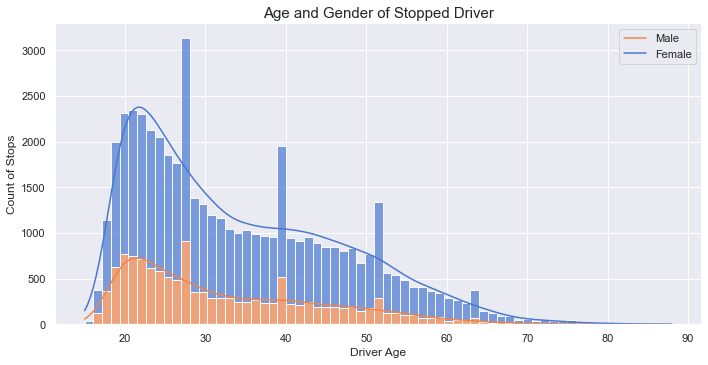

In [46]:
sns.displot(x = 'driver_age', hue = 'driver_gender', kde = True, data = ts, multiple = 'stack', palette = 'muted', alpha = 0.7, height = 5, aspect = 2, legend = False)
plt.title('Age and Gender of Stopped Driver', size = 15)
plt.xlabel('Driver Age')
plt.ylabel('Count of Stops')
plt.legend(['Male','Female'])

* **There are more men stopped then women however, the women stopped at each age group mirrors the men stopped at each group. This indicates age of a population, rather then gender is a greater factor is being stopped for a traffic violation. The age's stopped the most is 16-30.**

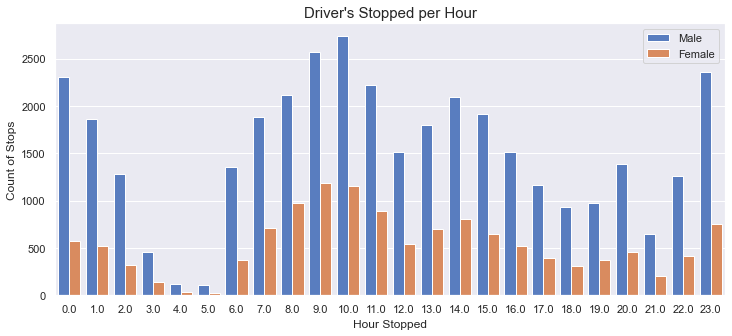

In [47]:
plt.figure(figsize = (12,5))
sns.countplot(x = ts.stop_hour, data = ts, hue = 'driver_gender', palette = 'muted')
plt.title("Driver's Stopped per Hour", size = 15)
plt.xlabel('Hour Stopped')
plt.ylabel('Count of Stops')
plt.legend(['Male','Female'])

* **Most traffic stops occur during daytime hours with the majority of stopped drivers at 7am through 11am. Again, there are more stopped men then women but the women stopped mirror the men stopped at each hour. This mirroring indicates that time of day is more a factor of being stopped then gender.**

Text(66.453125, 0.5, 'Stop Outcome')

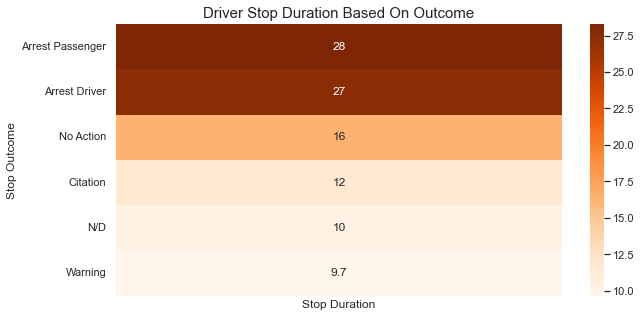

In [48]:
plt.figure(figsize = (10,5))
ax = sns.heatmap(stop_duration_based_on_outcome.sort_values(by = ['stop_duration'], ascending = False), annot = True, cmap = 'Oranges', xticklabels = False);
plt.title('Driver Stop Duration Based On Outcome', size = 15)
plt.xlabel('Stop Duration')
plt.ylabel('Stop Outcome')

* **Based on the heatmap visual, the longer a stopped driver waits the more likely the stop is to end in an arrest. The less time stopped driver waits, the more likely they are to be let go with a warning or be in response to a service call (N/D = No Data).**

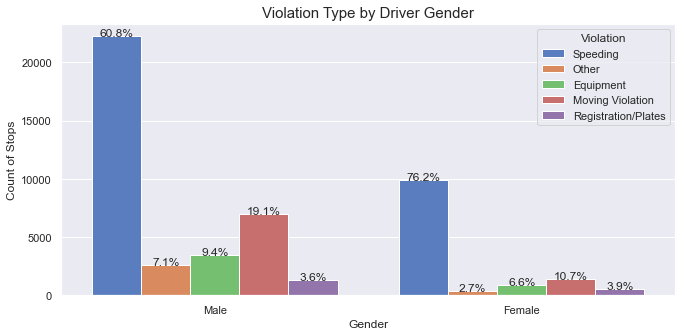

In [49]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), ha='center')
    
plt.figure(figsize=(11,5))
ax = sns.countplot(x = 'driver_gender', hue = 'violation', data = ts, palette = 'muted')
ax.set(ylabel='Count of Stops', xlabel='Gender')
ax.set_xticklabels(['Male','Female'])
ax.set_title('Violation Type by Driver Gender', size = 15)

plt.legend(title='Violation', loc='upper right', labels=['Speeding', 'Other', 'Equipment', 'Moving Violation', 'Registration/Plates'])

with_hue(ax, ts.driver_gender,2,5)

    

* **Speeding violations occur the most in both genders however, more women were stopped for speeding at 75% of total stops compared to 60% for men. Men and women appear to equally commit registration/plate violations at 4% of total stops. Men are 5%-10% more likely to be stopped for moving violations (reckless driving, hit and run, improper turn/lane change), equipment (window tints, loud exhaust), and other (violation of city/town ordinance, suspicious person).**